<a href="https://colab.research.google.com/github/BrianGakungi/IP-WEEK-2/blob/main/JOHN_NJAGI_IP_WEEK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a) UNIVARIATE ANALYSIS**

**1) DEFINING THE QUESTION**:
Which demographic factors highly influence the possession of active bank accounts

**2) METRIC FOR SUCCESS:**
Getting the demographic factors having strong correlation to bank account holders

**3)UNDERSTANDING THE CONTEXT:**
Data set is a summary of surveys conducted in Kenya, Uganda, Rwanda and Tanzania. It contains several demographic factors that influence the ability of individuals to possess bank accounts. In a bid to understand the state of financial inclusion we are to study the effects of these factors on the state of financial inclusion.



**4) EXPERIMENTAL DESIGN TAKEN:**
We will use the factorial experimental design to determine the effects of the multiple variables we have on whether one has a bank account

**5) DATA RELEVANCE:**
The data set we have for conducting our analysis is relevant considering it was extracted from surveys conducted by a reliable source i.e Finscope 

In [ ]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns
# import researchpy
!pip install -q researchpy
import researchpy as rp
from scipy import stats
import sklearn

In [ ]:
# Loading the data set
df = pd.read_csv("/content/Financial Dataset - 1.csv")

In [ ]:
# preview the data set
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**6) CHECKING THE DATA**

In [ ]:
# determining the number of records in our data
df.shape

(23524, 13)

In [ ]:
# checking datatype of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23510 non-null  object 
 1   year                        23524 non-null  int64  
 2   uniqueid                    23524 non-null  object 
 3   Has a Bank account          23488 non-null  object 
 4   Type of Location            23509 non-null  object 
 5   Cell Phone Access           23513 non-null  object 
 6   household_size              23496 non-null  float64
 7   Respondent Age              23490 non-null  float64
 8   gender_of_respondent        23490 non-null  object 
 9   The relationship with head  23520 non-null  object 
 10  marital_status              23492 non-null  object 
 11  Level of Educuation         23495 non-null  object 
 12  Type of Job                 23494 non-null  object 
dtypes: float64(2), int64(1), object

**7) TIDYING THE DATA SET**

In [ ]:
# Replace value in has a bank account column with integers
df["Has a Bank account"].replace(to_replace ="Yes",
                 value ="1", inplace=True)

In [ ]:
# Replace value in has a bank account column with integers
df["Has a Bank account"].replace(to_replace ="No",
                 value ="0", inplace=True)

In [ ]:
df = df.astype({'Has a Bank account':'float64'})

In [ ]:
# rename wrongly named columns
df.rename(columns={"Education Level":"Education_Level"}, inplace=True)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relationship with head,marital_status,Education_Level,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.rename(columns={"Respondent Age":"Respondent_Age"}, inplace=True)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relationship with head,marital_status,Education_Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


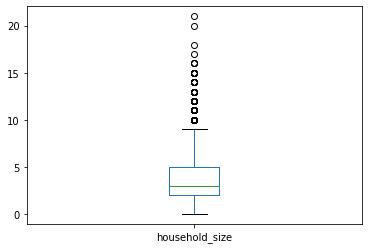

In [ ]:
# checking for outliers in household size
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(column=["household_size"], grid = False)


In [ ]:
# position of outliers in household size
df[(df['household_size'] > 10)]


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relationship with head,marital_status,Education_Level,Type of Job
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
348,Kenya,2018,uniqueid_349,No,Urban,Yes,12.0,23.0,Female,Child,Single/Never Married,Secondary education,Self employed
372,Kenya,2018,uniqueid_373,No,Urban,Yes,16.0,33.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
507,Kenya,2018,uniqueid_508,Yes,Rural,Yes,11.0,41.0,Male,Head of Household,Married/Living together,Primary education,Self employed
674,Kenya,2018,uniqueid_675,No,Urban,Yes,12.0,34.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23426,Uganda,2018,uniqueid_2007,No,Urban,Yes,13.0,19.0,Male,Parent,Single/Never Married,Secondary education,Self employed
23452,Uganda,2018,uniqueid_2036,No,Rural,Yes,13.0,48.0,Female,Spouse,Married/Living together,Primary education,Self employed
23461,Uganda,2018,uniqueid_2046,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,uniqueid_2053,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [ ]:
# trimming outliers
df[(df['household_size'] < 11)]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relationship with head,marital_status,Education_Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# capping outliers
upper_limit = df['household_size'].mean() + 3*df['household_size'].std()
lower_limit = df['household_size'].mean() - 3*df['household_size'].std()

In [ ]:
df['household_size'] = np.where(
    df['household_size']>upper_limit,
    upper_limit,
    np.where(
        df['household_size']<lower_limit,
        lower_limit,
        df['household_size']
    )
)

In [ ]:
# checking our data set 
df["household_size"].describe()

count    23476.000000
mean         3.669183
std          2.227577
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         10.522936
Name: household_size, dtype: float64

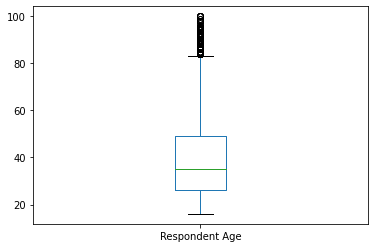

In [ ]:
# check for outliers in respondent age
df.boxplot(column=["Respondent Age"], grid = False)

In [ ]:
# position of outliers in age
print(np.where(df['Respondent_Age']>100))

(array([], dtype=int64),)


In [ ]:
# check for anomalies
q1_size = df["household_size"].quantile(.25)
q3_size = df["household_size"].quantile(.75)
iqr_size = q3_size - q1_size

q1_age = df["Respondent_Age"].quantile(.25)
q3_age = df["Respondent_Age"].quantile(.75)
iqr_age = q3_age - q1_age

print(iqr_size, iqr_age)


3.0 23.0


In [ ]:
# checking for missing values
df.isnull().sum()

country                       14
year                           0
uniqueid                       0
Has a Bank account            28
Type of Location               7
Cell Phone Access              3
household_size                24
Respondent_Age                26
gender_of_respondent          30
The relationship with head     0
marital_status                20
Education_Level               17
Type of Job                   18
dtype: int64

In [ ]:
# dropping records with more than 2 missing values
df.dropna(thresh = 11, inplace=True)

In [ ]:
# describing our data set to display the mean for household size and respondent age
df.describe()

,year,household_size,Respondent_Age
count,23500.000000,23476.000000,23474.000000
mean,2016.979149,3.669183,38.805359
std,0.900038,2.227577,16.521640
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,10.522936,100.000000


In [ ]:
# calculating median
m1 = df["household_size"].median()
m2 = df["Respondent_Age"].median()
print(m1, m2)

3.0 35.0


In [ ]:
# calculating mode 
md1 = df["household_size"].mode()
md2 = df["Respondent_Age"].mode()
print(md1, md2)


0    2.0
dtype: float64 0    30.0
dtype: float64


In [ ]:
# calculating standard deviation
sd1 = df["household_size"].std()
sd2 = df["Respondent_Age"].std()
print(sd1, sd2)
# 2.2799 is the deviation of household sizes from the mean of 3.683
# 16.5216 is the deviation of respondent ages from the mean of 38.805

2.2275771744273074 16.521639877390353


In [ ]:
# calculating variance
v1 = df["household_size"].var()
v2 = df["Respondent_Age"].var()
print(v1, v2)
# 5.198 is the square of the standard deviation of household size of 2.2799
# 272.9646 is the square of the standard deviation of respondent ages of 16.5216

4.962100068029546 272.96458423817506


In [ ]:
# Calculating range for respondent age
age_max = df["Respondent_Age"].max()
age_min = df["Respondent_Age"].min()
age_range = age_max - age_min

# calculating household size range
size_max = df["household_size"].max()
size_min = df["household_size"].min()
size_range = size_max - size_min
print(age_range, size_range)
# 84.0 represents the difference between the maximum and minimum respondent age in the dataset
# 21.0 represents the difference between the maximum and minimum household size in the dataset

84.0 10.522935793085313


In [ ]:
# Age quantiles
df["Respondent_Age"].quantile([0.25,0.5,0.75])
# Second quartile (0.50) is median of the whole data which is 35.0. First quartile (0.25) is median of upper half of the data which is 26.0. 
# And Third Quartile (0.75) is median of lower half of the data which is 49.0.

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent_Age, dtype: float64

In [ ]:
# household size quantiles
df["household_size"].quantile([0.25,0.5,.075])
# Second quartile (0.50) is median of the whole data which is 3.0. First quartile (0.25) is median of upper half of the data which is 2.0. 
# And Third Quartile (0.75) is median of lower half of the data which is 1.0.

0.250    2.0
0.500    3.0
0.075    1.0
Name: household_size, dtype: float64

In [ ]:
# age skewness
df["Respondent_Age"].skew()
# the age distribution is positively skewed since 0.84 is a positive figure. 
#It also indicates that the mean of respondent ages is greater than the mode

0.8416230874616006

In [ ]:
# household size skewness
df["household_size"].skew()
# the household size distribution is positively skewed since 0.97 is a positive figure. 
#It also indicates that the mean of household sizes is greater than the mode

0.9768284170189804

In [ ]:
# age kurtosis
df["Respondent_Age"].kurt()
# kurtosis for respondent ages is greater than 0 hence is a leptokurtic distribution indicating the presence of outliers

0.10081871671609344

In [ ]:
#household size kurtosis
df["household_size"].skew()
# kurtosis for household sizes is greater than 0 hence is a leptokurtic distribution indicating the presence of outliers

0.9768284170189804

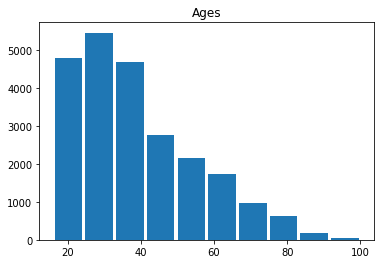

In [ ]:
# ages histogram
age = df['Respondent_Age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.title('Ages')
plt.show()

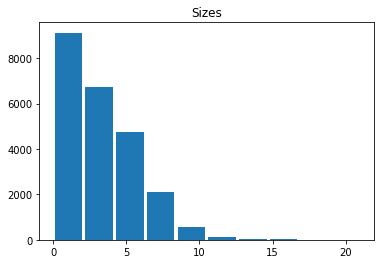

In [ ]:
# household histogram
age = df['household_size']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.title('Sizes')
plt.show()

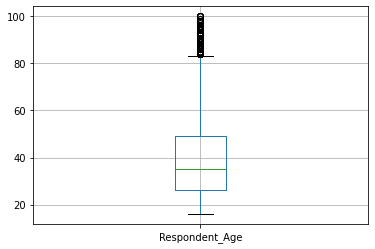

In [ ]:
# age box plot
df.boxplot(["Respondent_Age"])

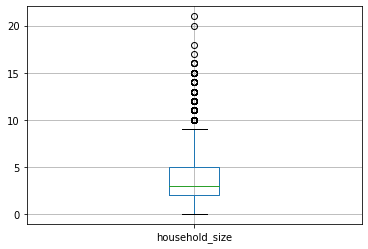

In [ ]:
# household size box plot
df.boxplot(["household_size"])

In [ ]:
# frequency table for education level
df.Education_Level.value_counts()

Primary education                  12766
No formal education                 4505
Secondary education                 4220
Tertiary education                  1154
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: Education_Level, dtype: int64

In [ ]:
# frequency table for household size
df.household_size.value_counts()

2.0     5121
1.0     3961
3.0     3533
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      355
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [ ]:
#  frequency table for ages
df.Respondent_Age.value_counts()

30.0     1050
35.0      834
25.0      790
28.0      746
32.0      713
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: Respondent_Age, Length: 85, dtype: int64

**b) BIVARIATE ANALYSIS**

In [ ]:
# preview dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relationship with head,marital_status,Education_Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


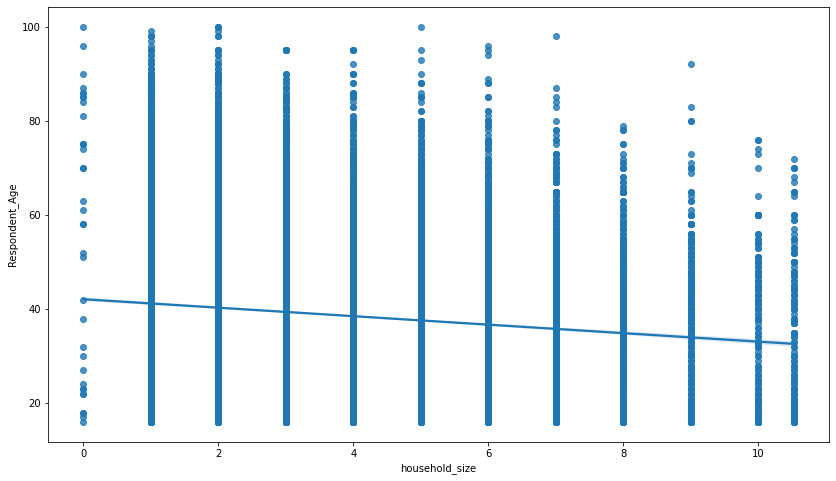

In [ ]:
# scatter plot between respondent ages and household size
from seaborn.relational import scatterplot
plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='household_size', y='Respondent_Age')

In [ ]:
# pearson correlation coefficient
coeff = df["household_size"].corr(df["Respondent_Age"], method="pearson") 
print(coeff)
# this correlation of -0.12 signifies a weak negative correlation between age of respondents and household size
# hence an increase in age has little effect on the movement of household size 
# in the opposite direction

-0.12148504129725994


**c) MULTIVARIATE ANALYSIS**

In [ ]:
# check the factorability or sampling adequacy using Bartlett’s Test
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# In Bartlett ’s test, the p-value indicates the test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(449.098237885782, 6.454130844041128e-54)

In [ ]:
# choosing the number of factors using the Kaiser criterion
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# we will choose only 3 factors since only 3 have an eigenvalue greather than 1

,Original_Eigenvalues
0,1.127094
1,1.016336
2,1.000535
3,0.856036


In [ ]:
# Performing Factor Analysis
# Creating factor analysis object and perform factor analysis

fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")
fa.loadings
# factor 1 has high factor loadings for respondent age and household size
# factor 2 has no high loadings
# factor 3 has no high loadings for any variable
# we'll take only 1 factor

,Factor1,Factor2,Factor3
year,0.007429,0.291510,0.007044
household_size,-0.370614,-0.185724,0.083247
Respondent_Age,0.381639,-0.078321,0.067988
gender_of_respondent,0.003669,0.002264,0.170916


In [ ]:
# Performing factor analysis for 1 factor
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
year,0.053289
household_size,-0.997683
Respondent_Age,0.119978
gender_of_respondent,-0.010643


In [ ]:
#Getting variance of the factors
# 
fa.get_factor_variance()

,Factor1
SS Loadings,1.01272
Proportion Var,0.25318
Cumulative Var,0.25318


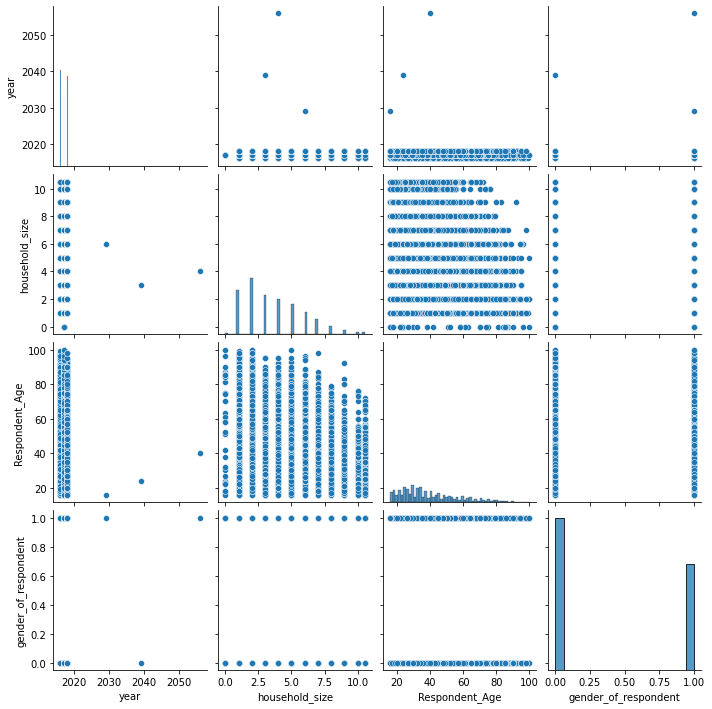

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

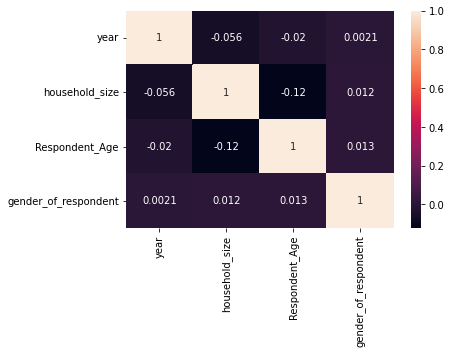

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

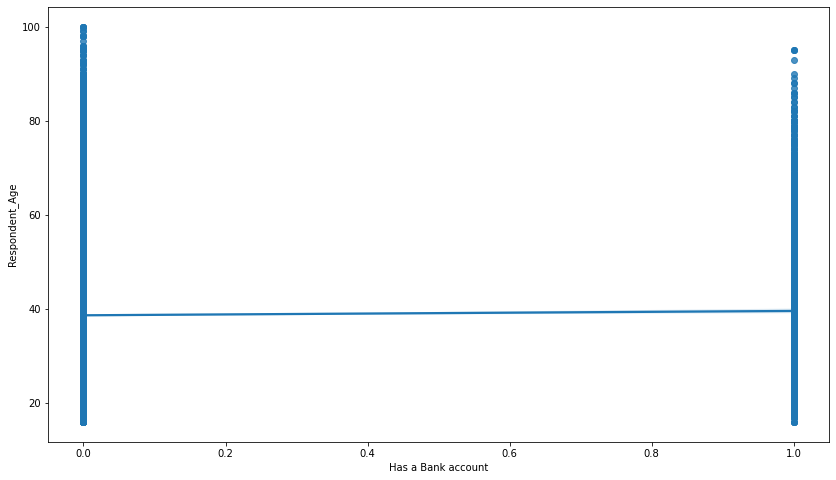

In [ ]:
# Implementing the Solution
# 
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x='Has a Bank account', y='Respondent_Age')

**Follow up questions**

**a). Did we have the right data?**
No since most of our columns were categorical in nature and had little to no correlation with the status of one being a bank account holder

**b). Do we need other data to answer our question?**
Yes supplementary data is needed to answer our question

**c). Did we have the right question**
Yes we had the right question in order to solve the research problem